## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5** <br>
R1 = 2 <br>
R2 = 2 <br>
R3 = 1.5 <br>
R4 = 1 <br>
R5 = 1.25 <br>
Nota_final = 7.75

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
#Seu Código aqui....

df = pd.read_csv('aptos.csv')
df.head(15)


,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

- **METROS**: Metragem quadrada do apartamento 
- **VALOR**: Valor do apartamento
- **QUARTOS**: Quantidade de quartos contidos no apartamento
- **VAGAS**: Quantidade de vagas na garagem
- **REFORMADO**: Situação do apartamento (0 para 'não reformado' e 1 para 'reformado')
- **BAIRRO**: Bairro em que o apartamento se encontra

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  O **VALOR** está relacionada com todas as outras colunas. Pois todas as outras colunas influenciam no valor do apartamento. 
2.  A quantidade de **QUARTOS** e de **VAGAS** pode ser relacionada com a quantidade de **METROS** quadrados do apartamento. Uma vez com mais quartos, um apartamento tende a ser maior.

<AxesSubplot:>

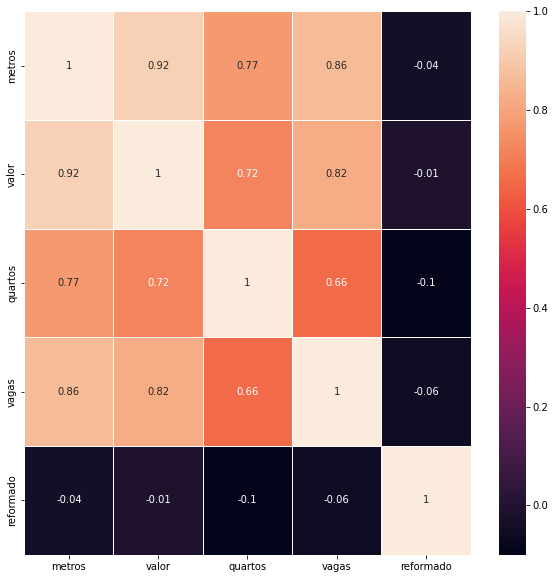

In [3]:
#Para explicar melhor esses cenários, segue uma matriz de correlação

import seaborn as sns 
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

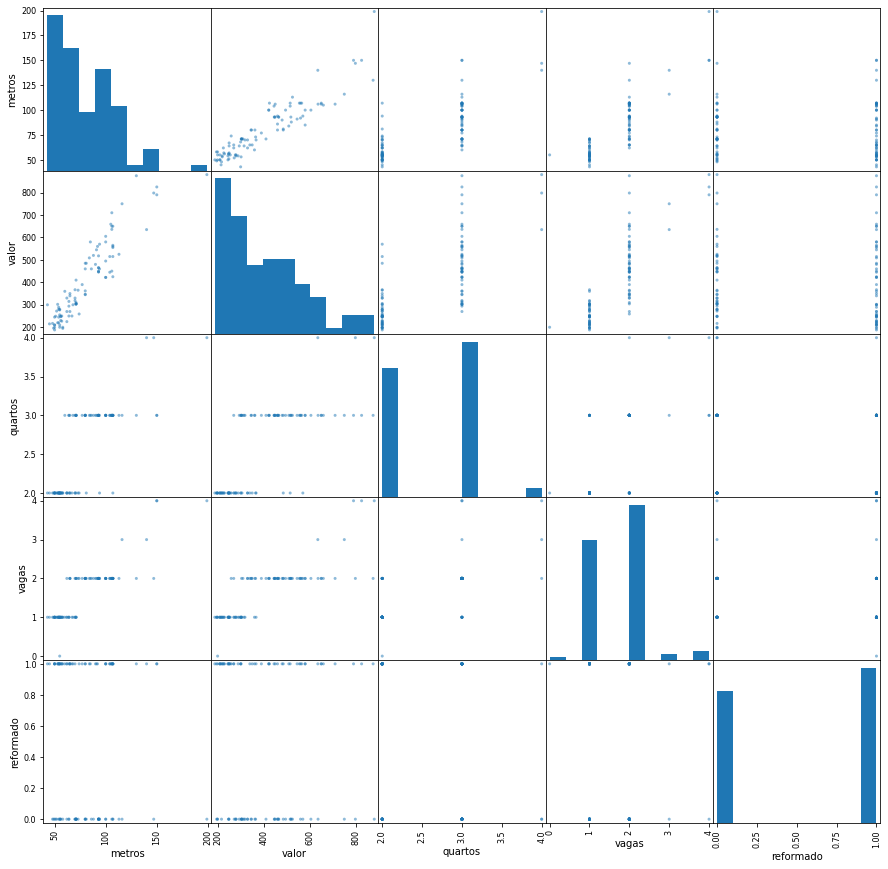

In [4]:
#Seu Código aqui...


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(15,15))
plt.show()

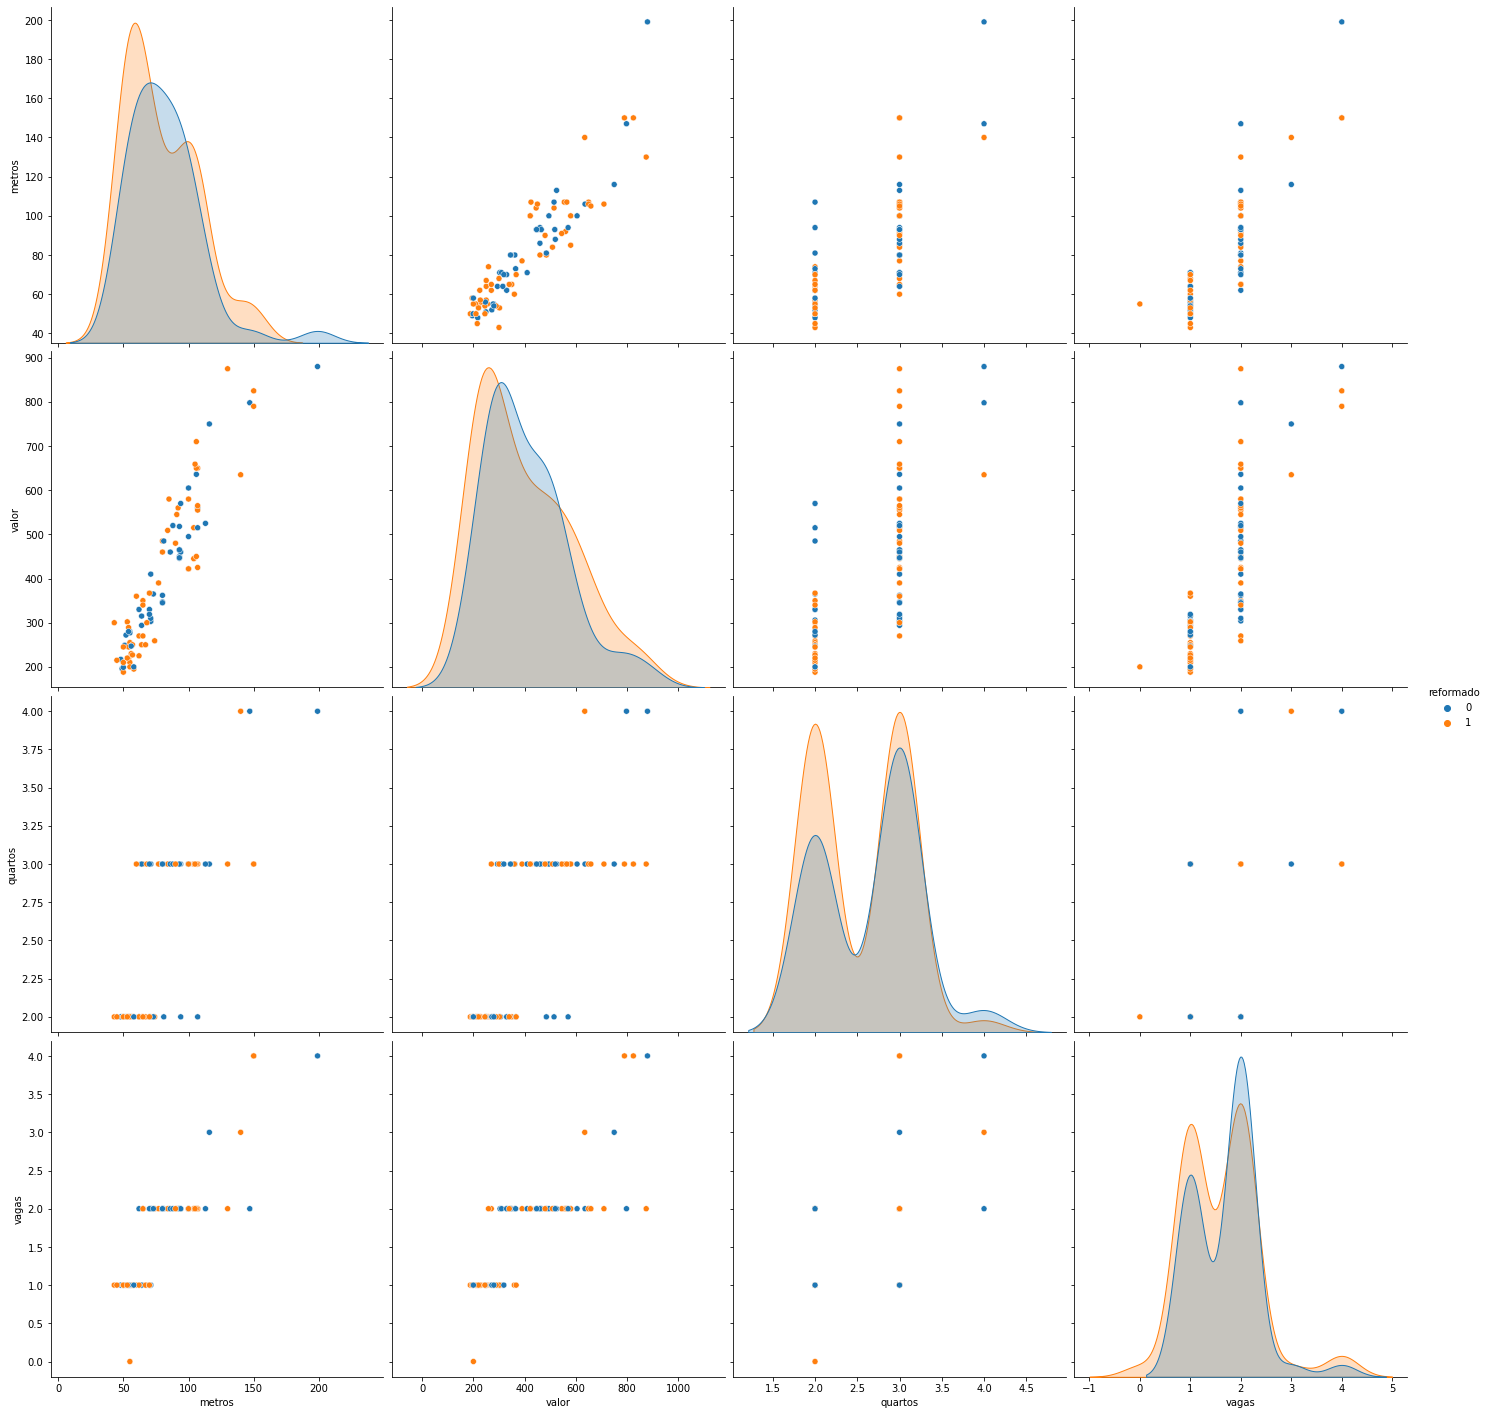

In [5]:
#Seu Código aqui...
sns.pairplot(df, hue='reformado', height=5)
plt.show()




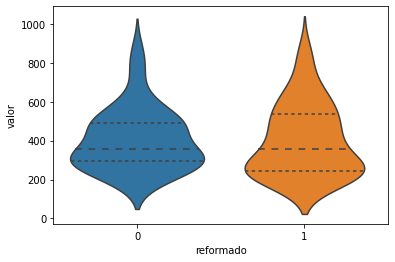

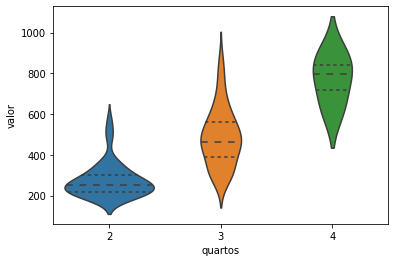

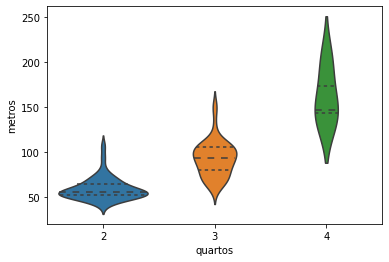

In [6]:
violino = sns.violinplot(y='valor', x='reformado', data=df, inner='quartile')
plt.show()

violino = sns.violinplot(y='valor', x='quartos', data=df, inner='quartile')
plt.show()

violino = sns.violinplot(y='metros', x='quartos', data=df, inner='quartile')
plt.show()


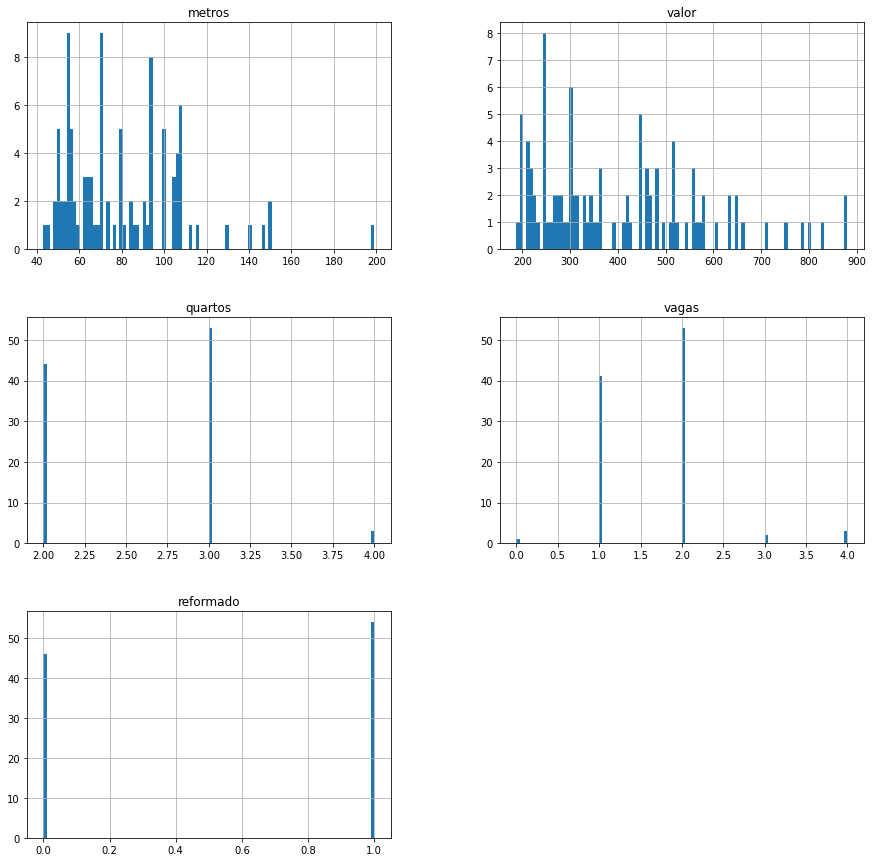

In [7]:
df.hist(bins=100, figsize=(15, 15))
plt.show()

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 


**RESPOSTA:** Sim, é possível observar outliers nos valores, quando relacionados com a quantidade de quartos no apartamento.
Para os apartamentos de 3 quartos, apesar de ter o seu segundo quartil com o valor de 600, é possível encontrar um apartamento com 3 quartos que custa 1000.
Outros outliers observáveis é na metragem dos apartamentos, é possível ver que a grande maioria dos apartamentos tem aproximadamente de 45m² a 150m², porém existem aproximadamente dois casos onde a metragem chega a 200m²

Foram utilizados métodos de análise de dados com base em gráficos.

Os dados não sofreram nenhuma remoção. A análise foi feita a partir do dataset original, isso é, sem alterações.


## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

A partir do momento em que eu e a minha equipe precisamos pré-estabelecer os dados para que o algoritmo treine, o mais recomendado são tecnicas de aprendizado supervisionado.

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo Regressão linear
2. algoritimo Regressão polinomial

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo Regressão linear é uma técnica de predição que tenta traçar uma linha reta entre os dados tentando errar o mínimo possível. Um modelo linear faz predições calculando o peso das sumas dos inputs, e de uma constante chamada 'bias'.
O Y_predito será a soma da constante peso da rede com cada entrada de X vezes a constante de peso da rede
2. algoritimo Regreção polinomial é uma boa escolha para achar correlações. Pois esse algoritmo encontra correlações com variáveis independentes dependendo do grau do polinômio. Para isso, o algoritmo pega os dados já existentes e os eleva polinomialmente para procurar correlações entre os dados.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [24]:
#Dividindo conjunto de treinamento
X = df[['metros', 'quartos']]
#X = df[['RM']]
Y = df['valor']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (100, 2) e saidas (100,)


In [25]:
#Seu Código aqui...

from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)


print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

(80, 2)
(20, 2)
(80,)
(20,)


Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [26]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão 
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)

LinearRegression()

In [27]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else: 
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  -58.15677483758202
(B) Inclinação:  [ 5.3172733  12.69637358]
Nossa equação é: Y_pred = -58.16 + 5.32 * X_LSTAT + 12.7 * X_RM


Text(0, 0.5, 'Valor Predito')

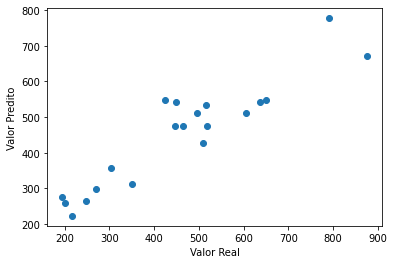

In [28]:
y_teste_predito = lin_model.predict(X_teste)
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

In [29]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )
r2_train = lin_model.score(X_treino, Y_treino)
r2_test = lin_model.score(X_teste, Y_teste)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

Soma dos Erros ao Quadrado (SSE): 118889 
Erro Quadrático Médio (MSE): 5944.44
Erro Médio Absoluto (MAE): 59.97
Raiz do Erro Quadrático Médio (RMSE): 77.10 
R2-score: 0.71
R2 no set de treino: 0.85
R2 no set de teste: 0.83


### Algoritmo 2

Soma dos Erros ao Quadrado (SSE): 10598 
Erro Quadrático Médio (MSE): 105.98
Erro Médio Absoluto (MAE): 7.85
Raiz do Erro Quadrático Médio (RMSE): 10.29 
R2-score: 0.86
R2 no set de treino: 0.86
R2 no set de teste: 1.00


C:\Users\giuli\AppData\Local\Temp\ipykernel_13128\1703536341.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\giuli\AppData\Local\Temp\ipykernel_13128\1703536341.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


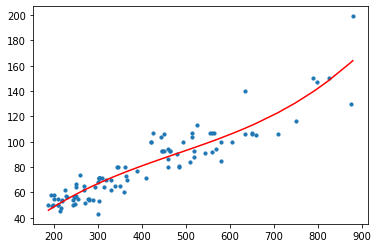

In [14]:
#Seu Código aqui...

import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

x = df['valor']
y = df['metros']

x = x[:, np.newaxis]
y = y[:, np.newaxis]

#define o o grau do polinomio e aplica o modelo
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred))
r2_train = model.score(x_poly, y)
r2_test = model.score(x_poly, y_poly_pred)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)


plt.scatter(x, y, s=10)

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()

Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 0,83 | X |
| teste  | 0,91 | 0,86 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:**

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

**Resposta:** Aproximadamente: 350

In [15]:
#Seu Código aqui...
df_centro = df[df['bairro'] == "Centro"]

df_centro.head()

df_pesquisa = df_centro[df_centro['metros'] == 65]
df_pesquisa = df_pesquisa[df_pesquisa['quartos'] == 2]
df_pesquisa = df_pesquisa[df_pesquisa['vagas'] == 2]
df_pesquisa = df_pesquisa[df_pesquisa['reformado'] == 1]
df_pesquisa.head()

,metros,valor,quartos,vagas,reformado,bairro
12,65,350,2,2,1,Centro


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Uma vez este projeto sendo acadêmico, uma métrica de acurácia que fique acima de 0.80 é extremamente satisfatória. Porém sempre há espaço para melhoria

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Eu usaria algoritmos diferentes, poderia transformar os valores booleanos de 'Reformado' para texto, onde eu substituiria 0 pelo texto 'não-reformado' e 1 por 'reformado'




